# Building a Simple LIF Model with NEURON

A great exercise for anyone looking to get familiar with building neuron models using NEURON. Try reproducing on your own!

In [84]:
%pip install neuron --quiet
from neuron import h
from neuron.units import mV, ms

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [85]:
# Creating a singular, soma region for our cell model
# and insert leaky channel

soma = h.Section(name="soma")
soma.insert("pas")

print(soma.psection())


{'point_processes': {}, 'density_mechs': {'pas': {'g': [0.001], 'e': [-70.0], 'i': [0.0]}}, 'ions': {}, 'morphology': {'L': 100.0, 'diam': [500.0], 'pts3d': [], 'parent': None, 'trueparent': None}, 'nseg': 1, 'Ra': 35.4, 'cm': [1.0], 'regions': set(), 'species': set(), 'name': 'soma', 'hoc_internal_name': '__nrnsec_0x1201a0ae0', 'cell': None}


In [86]:
# Insert clamp at end of soma and set stimulation parameters
iclamp = h.IClamp(soma(0.1))
iclamp.delay = 2 * ms
iclamp.dur = 10 * ms
iclamp.amp = 10 * mV

soma_v = h.Vector().record(soma(0.1)._ref_v)
soma_t = h.Vector().record(h._ref_t)


In [87]:
# Run simulation 
h.load_file("stdrun.hoc")
h.finitialize(-70 * mV)
h.continuerun(50 * ms)

0.0

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


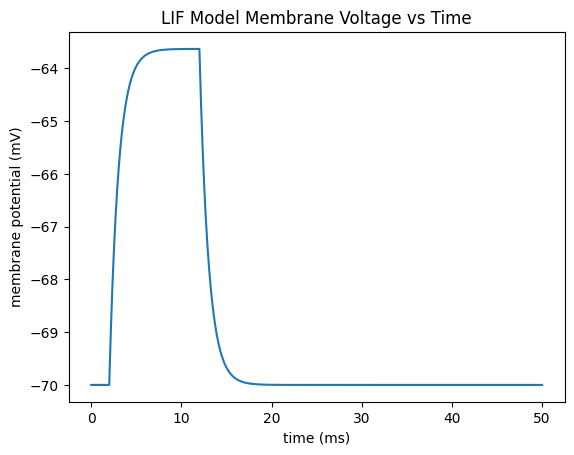

In [88]:
%pip install matplotlib --quiet
import matplotlib.pyplot as plt

plt.plot(soma_t, soma_v)
plt.xlabel("time (ms)")
plt.ylabel("membrane potential (mV)")
plt.title("LIF Model Membrane Voltage vs Time")
plt.show()